<a href="https://colab.research.google.com/github/Gungtr4/University-project/blob/main/Cluster/Kmeans(Online_Retail).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from google.colab import files
uploaded = files.upload()

Saving OR_train.csv to OR_train.csv


In [ ]:
df = pd.read_csv("OR_train.csv")
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    1
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     1
Country        0
dtype: int64

In [ ]:
df = df.dropna()
df['CustomerID'] = df['CustomerID'].astype(str)

In [ ]:
df['Amount'] = df['UnitPrice'] * df['Quantity']
df = df.reset_index()
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [ ]:
df_amount = df.groupby('CustomerID')['Amount'].sum()
df_frequency = df.groupby('CustomerID')['InvoiceNo'].count()
df_f = pd.merge(df_amount,df_frequency ,how = 'inner', on='CustomerID')
df_f.head(1000)

,Amount,InvoiceNo
CustomerID,,
12431.0,358.25,14
12583.0,855.86,20
12791.0,192.60,2
12838.0,390.79,59
13047.0,366.63,17
13255.0,225.70,6
13408.0,1024.68,11
13448.0,443.96,18
13694.0,842.12,6


In [ ]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
minimax = preprocessing.MinMaxScaler().fit_transform(df_f)
data = pd.DataFrame(minimax, index=df_f.index, columns=df_f.columns)
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 12431.0 to 18085.0
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Amount     48 non-null     float64
 1   InvoiceNo  48 non-null     float64
dtypes: float64(2)
memory usage: 1.1+ KB


{1: [0.30087333004661876, 0.186945816341878], 2: [0.32318267696821945, 0.6657495702883091], 3: [0.5669708009692134, 0.3982539588987647]}


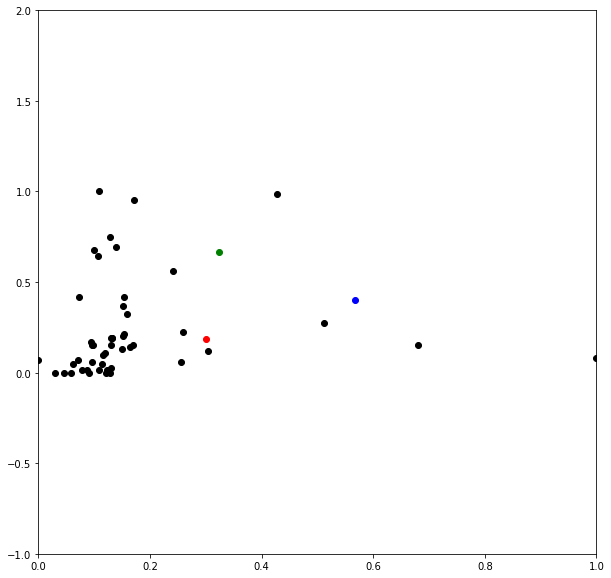

In [ ]:
np.random.seed(60)
k = 3
centroids = {
    i+1: [np.random.uniform(0, 1), np.random.uniform(0, 1)]
    for i in range(k)
} 
print(centroids)
fig = plt.figure(figsize=(10,10))
plt.scatter(data['Amount'],data['InvoiceNo'],color='k')
colmap = {1:'r',2:'g',3:'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color =colmap[i])
plt.xlim(0,1)
plt.ylim(-1,2)
plt.show()

In [ ]:
#assignment 
def ass(data, centroids):
  for i in centroids.keys():
    data['distance_from {}'.format(i)] = (
        np.sqrt(
            (data['Amount'] - centroids[i][0]) **2
            +(data['InvoiceNo'] - centroids[i][1]) **2
        )
    )
  centroids_distance_cols = ['distance_from {}'.format(i) for i in centroids.keys()]
  data['closest'] = data.loc[:,centroids_distance_cols].idxmin(axis=1)
  data['closest'] = data['closest'].map(lambda x: int(x.lstrip('distance_from ')))
  data['color'] = data['closest'].map(lambda x: colmap[x])
  return data

def show_ass(data,centroids):
  print(data)
  fig = plt.figure(figsize=(10,10))
  plt.scatter(data['Amount'],data['InvoiceNo'],color=data['color'],alpha=0.5,edgecolors='k')
  colmap = {1:'r',2:'g',3:'b',4:'y'}
  for i in centroids.keys():
    plt.scatter(*centroids[i], color =colmap[i])
  plt.xlim(0,1)
  plt.ylim(-1,2)
  plt.show()

In [ ]:
#update
import copy
first_centroids = copy.deepcopy(centroids)
old_centroids = copy.deepcopy(centroids)

def update(k):
  for i in centroids.keys():
    centroids[i][0] = np.mean(data[data['closest'] == i]['Amount'])
    centroids[i][1] = np.mean(data[data['closest'] == i]['InvoiceNo'])
  return k

def show_update(data,centroids):
  fig = plt.figure(figsize=(10,10))
  ax = plt.axes()
  plt.scatter(data['Amount'],data['InvoiceNo'],color=data['color'],alpha=0.5,edgecolors='k')
  colmap = {1:'r',2:'g',3:'b',4:'y'}
  for i in centroids.keys():
      plt.scatter(*centroids[i], color =colmap[i])
  plt.xlim(0,1)
  plt.ylim(-1,2)
  for i in old_centroids.keys():
    old_x = old_centroids[i][0]
    old_y = old_centroids[i][1]
    dx =(centroids[i][0] - old_centroids[i][0])* 0.75
    dy =(centroids[i][1] - old_centroids[i][1])* 0.75
    ax.arrow(old_x, old_y, dx, dy, head_width=0.02, head_length=0.01, fc = colmap[i], ec = colmap[i])
  plt.show() 


iterasi 1
              Amount  InvoiceNo  ...  closest  color
CustomerID                       ...                
12431.0     0.130016   0.154762  ...        1      r
12583.0     0.259481   0.226190  ...        1      r
12791.0     0.086919   0.011905  ...        1      r
12838.0     0.138482   0.690476  ...        2      g
13047.0     0.132196   0.190476  ...        1      r
13255.0     0.095530   0.059524  ...        1      r
13408.0     0.303403   0.119048  ...        1      r
13448.0     0.152316   0.202381  ...        1      r
13694.0     0.255906   0.059524  ...        1      r
13705.0     0.119581   0.107143  ...        1      r
13747.0     0.057519   0.000000  ...        1      r
13748.0     0.089884   0.000000  ...        1      r
13758.0     0.131109   0.190476  ...        1      r
13767.0     0.168946   0.154762  ...        1      r
14045.0     0.121730   0.000000  ...        1      r
14307.0     0.240553   0.559524  ...        2      g
14527.0     0.029654   0.000000  ...

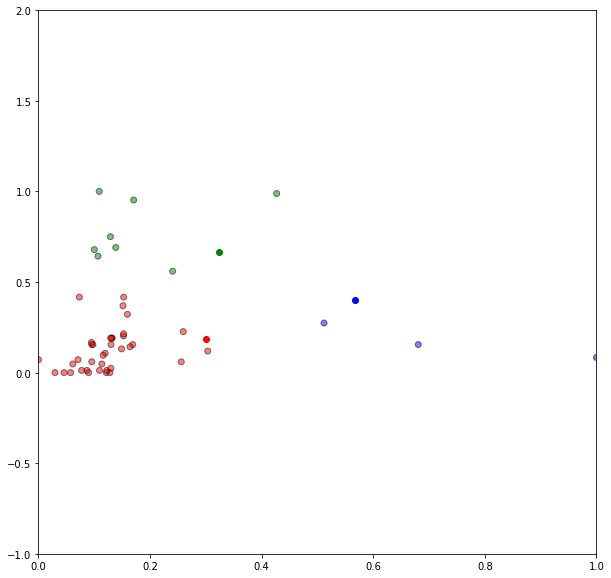

iterasi 2


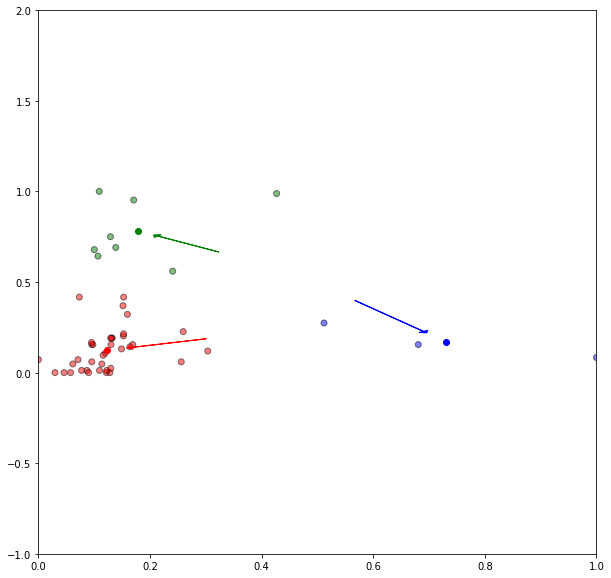

              Amount  InvoiceNo  ...  closest  color
CustomerID                       ...                
12431.0     0.130016   0.154762  ...        1      r
12583.0     0.259481   0.226190  ...        1      r
12791.0     0.086919   0.011905  ...        1      r
12838.0     0.138482   0.690476  ...        2      g
13047.0     0.132196   0.190476  ...        1      r
13255.0     0.095530   0.059524  ...        1      r
13408.0     0.303403   0.119048  ...        1      r
13448.0     0.152316   0.202381  ...        1      r
13694.0     0.255906   0.059524  ...        1      r
13705.0     0.119581   0.107143  ...        1      r
13747.0     0.057519   0.000000  ...        1      r
13748.0     0.089884   0.000000  ...        1      r
13758.0     0.131109   0.190476  ...        1      r
13767.0     0.168946   0.154762  ...        1      r
14045.0     0.121730   0.000000  ...        1      r
14307.0     0.240553   0.559524  ...        2      g
14527.0     0.029654   0.000000  ...        1 

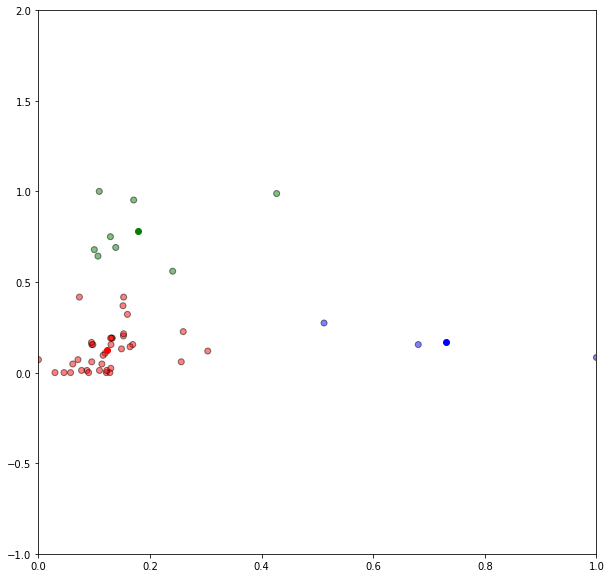

Perubahan Centroids :
Centroid awal
          1         2         3
0  0.300873  0.323183  0.566971
1  0.186946  0.665750  0.398254
Centroid akhir
          1         2         3
0  0.122404  0.177656  0.730829
1  0.122909  0.782738  0.170635


In [ ]:
#loop
print('iterasi 1')
data = ass(data,centroids)
show_ass(data,centroids)
i=2
while True:
  print('iterasi {}'.format(i))
  closest_centroids = data['closest'].copy(deep=True)
  centroids = update(centroids)
  show_update(data,centroids)
  data = ass(data,centroids)
  show_ass(data,centroids)
  i+=1
  if closest_centroids.equals(data['closest']):
    print('Perubahan Centroids :')
    print('Centroid awal')
    print(pd.DataFrame(first_centroids))
    print('Centroid akhir')
    print(pd.DataFrame(centroids))
    break

In [ ]:
potensial = data.groupby('closest')['InvoiceNo'].count()
potensial

closest
1    37
2     8
3     3
Name: InvoiceNo, dtype: int64